<p style="background-color:orange;font-family:newtimeroman;font-size:30px;line-height:1.7em;text-align:center;border-radius:5px 5px">Adult_Census _Income_Analysis_and_Prediction_classification_with_ANN</p>


<p style="background-color:green;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px"><b>Business Problem</b></p>

Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
data = pd.read_csv(r"C://PYTHON//AI_ML//Deep_Learning//adult.csv", na_values='?')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Data Wrangling</p>

In [3]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**Renaming Column Index**

In [4]:

data.rename(columns = {'educational-num':'educational_num',"marital-status":"marital_status","capital-gain":"capital_gain","capital-loss":"capital_loss","hours-per-week":"hours_per_week","native-country":"native_country"}, inplace = True)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

**Checking For Null Values**

In [6]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

**Filling Null Values**

In [7]:
data['workclass'].fillna(data.workclass.mode()[0], inplace = True)
data['occupation'].fillna(data.occupation.mode()[0], inplace = True)
data['native_country'].fillna(data.native_country.mode()[0], inplace = True)

**Re-Checking For Null Values**

In [8]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

**Checking Shape Of the Data before deleting duplicates**

In [9]:
data.shape

(48842, 15)

**Checking For Duplicates**

In [10]:
var = data.duplicated().sum()
var 

53

In [11]:
# Droping Duplicates Rows
data = data.drop_duplicates()

**Checking Shape Of the Data Afetr deleting duplicates**

In [12]:
data.shape

(48789, 15)

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Descriptive Analysis</p>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48789 non-null  int64 
 1   workclass        48789 non-null  object
 2   fnlwgt           48789 non-null  int64 
 3   education        48789 non-null  object
 4   educational_num  48789 non-null  int64 
 5   marital_status   48789 non-null  object
 6   occupation       48789 non-null  object
 7   relationship     48789 non-null  object
 8   race             48789 non-null  object
 9   gender           48789 non-null  object
 10  capital_gain     48789 non-null  int64 
 11  capital_loss     48789 non-null  int64 
 12  hours_per_week   48789 non-null  int64 
 13  native_country   48789 non-null  object
 14  income           48789 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [14]:
data.describe().T.style.set_properties(**{'background-color': 'orange','color': 'black','border-color': 'black'})

,count,mean,std,min,25%,50%,75%,max
age,48789.000000,38.653139,13.708426,17.000000,28.000000,37.000000,48.000000,90.000000
fnlwgt,48789.000000,189669.662157,105618.212169,12285.000000,117555.000000,178140.000000,237608.000000,1490400.000000
educational_num,48789.000000,10.078809,2.570072,1.000000,9.000000,10.000000,12.000000,16.000000
capital_gain,48789.000000,1080.239829,7455.980728,0.000000,0.000000,0.000000,0.000000,99999.000000
capital_loss,48789.000000,87.597368,403.213066,0.000000,0.000000,0.000000,0.000000,4356.000000
hours_per_week,48789.000000,40.425895,12.392856,1.000000,40.000000,40.000000,45.000000,99.000000


<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Feature Engineering</p>

**Dealing Outliers**

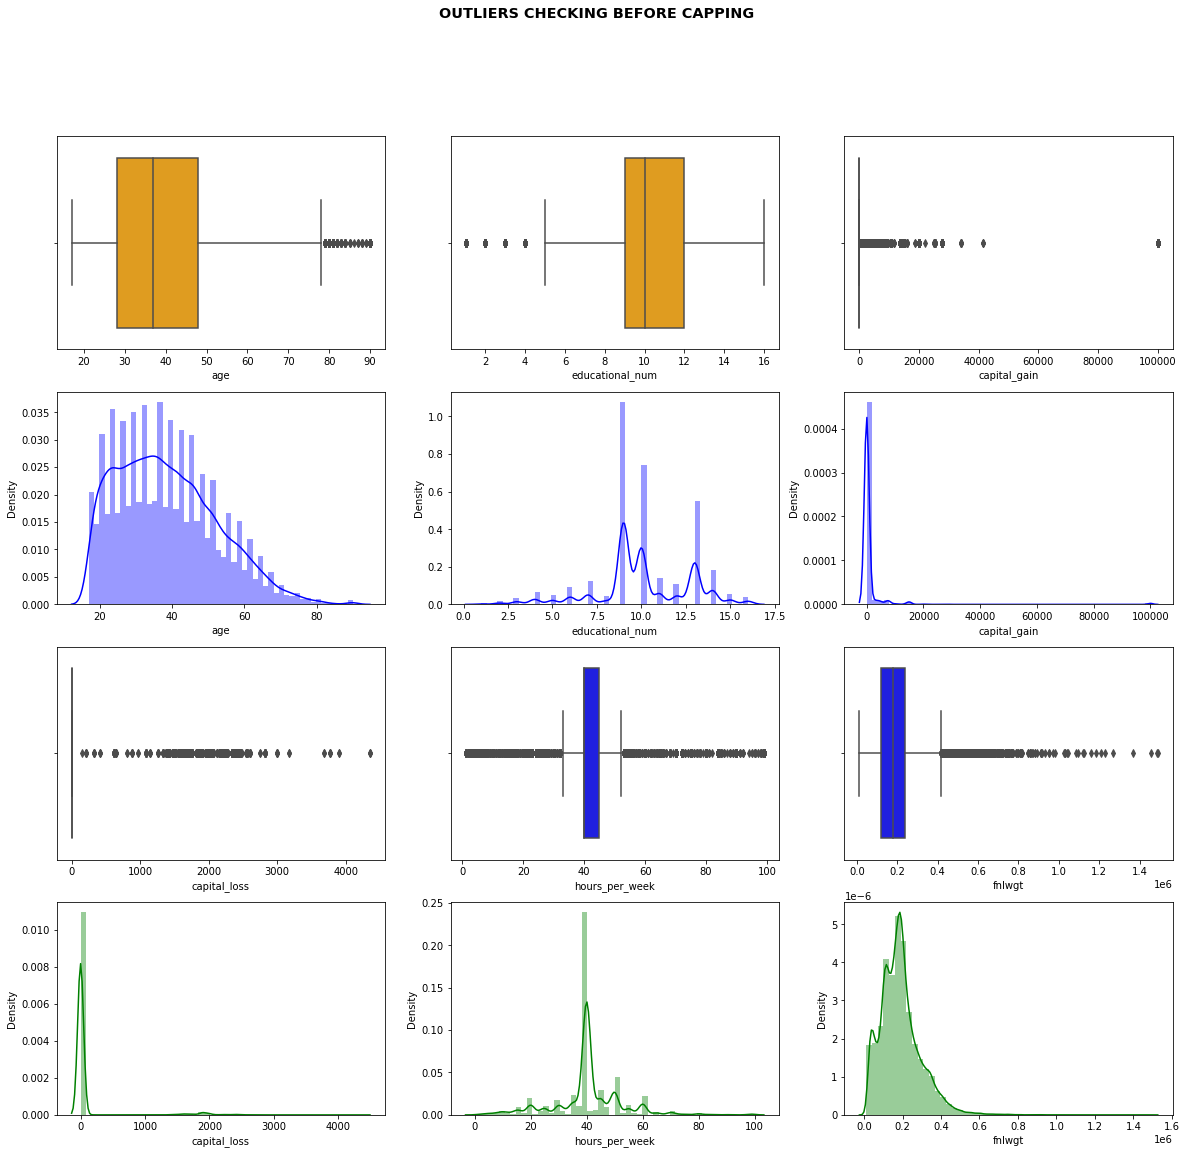

In [15]:
plt.figure(figsize = (20,18))
plt.suptitle("OUTLIERS CHECKING BEFORE CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(4,3,1)
sns.boxplot(data["age"],color = "orange")
plt.subplot(4,3,4)
sns.distplot(data["age"],color = "blue")
plt.subplot(4,3,2)
sns.boxplot(data["educational_num"], color = "orange")
plt.subplot(4,3,5)
sns.distplot(data["educational_num"], color = "blue")
plt.subplot(4,3,3)
sns.boxplot(data["capital_gain"],color = "orange")
plt.subplot(4,3,6)
sns.distplot(data["capital_gain"], color = 'blue')
plt.subplot(4,3,7)
sns.boxplot(data["capital_loss"],color = "blue")
plt.subplot(4,3,10)
sns.distplot(data["capital_loss"], color = 'green')
plt.subplot(4,3,8)
sns.boxplot(data["hours_per_week"],color = "blue")
plt.subplot(4,3,11)
sns.distplot(data["hours_per_week"], color = 'green')
plt.subplot(4,3,9)
sns.boxplot(data["fnlwgt"],color = "blue")
plt.subplot(4,3,12)
sns.distplot(data["fnlwgt"], color = 'green')
plt.show()

__OUTLIERS CAPPING WITH IQR METHOD__

In [16]:
def outliers(data, feature):
    Q1= data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "age")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  78.0
Lower Whisker:  -2.0


In [17]:
data["age"] = np.where(data["age"] > upper, upper,
              np.where(data["age"] < lower, lower,
                       data["age"]))

In [18]:
upper, lower = outliers(data, "educational_num")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  16.5
Lower Whisker:  4.5


In [19]:
data["educational_num"] = np.where(data["educational_num"] > upper, upper,
                          np.where(data["educational_num"] < lower, lower,
                                   data["educational_num"]))

In [20]:
upper, lower = outliers(data, "capital_gain")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  0.0
Lower Whisker:  0.0


In [21]:
data["capital_gain"] = np.where(data["capital_gain"] > upper, upper,
                       np.where(data["capital_gain"] < lower, lower,
                                data["capital_gain"]))

In [22]:
upper, lower = outliers(data, "capital_loss")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  0.0
Lower Whisker:  0.0


In [23]:
data["capital_loss"] = np.where(data["capital_loss"] > upper, upper,
                       np.where(data["capital_loss"] < lower, lower,
                                data["capital_loss"]))

In [24]:
upper, lower = outliers(data, "hours_per_week")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  52.5
Lower Whisker:  32.5


In [25]:
data["hours_per_week"] = np.where(data["hours_per_week"] > upper, upper,
                         np.where(data["hours_per_week"] < lower, lower,
                                  data["hours_per_week"]))

In [26]:
upper, lower = outliers(data, "fnlwgt")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  417687.5
Lower Whisker:  -62524.5


In [27]:
data["fnlwgt"] = np.where(data["fnlwgt"] > upper, upper,
                 np.where(data["fnlwgt"] < lower, lower,
                          data["fnlwgt"]))

__AFETR CAPPING OUTLIERS__

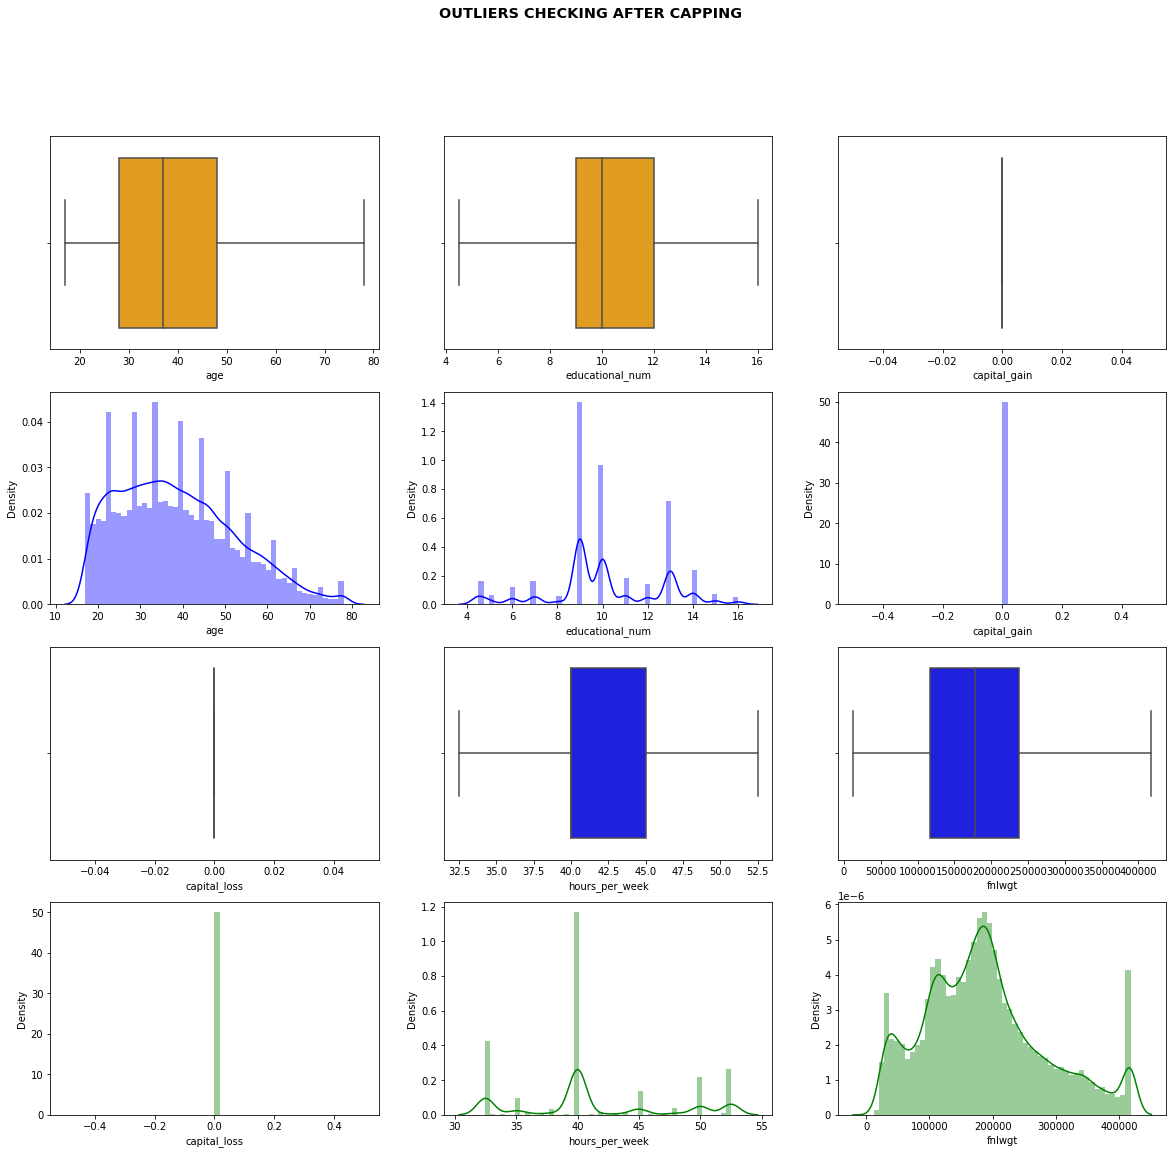

In [28]:
plt.figure(figsize = (20,18))
plt.suptitle("OUTLIERS CHECKING AFTER CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(4,3,1)
sns.boxplot(data["age"],color = "orange")
plt.subplot(4,3,4)
sns.distplot(data["age"],color = "blue")
plt.subplot(4,3,2)
sns.boxplot(data["educational_num"], color = "orange")
plt.subplot(4,3,5)
sns.distplot(data["educational_num"], color = "blue")
plt.subplot(4,3,3)
sns.boxplot(data["capital_gain"],color = "orange")
plt.subplot(4,3,6)
sns.distplot(data["capital_gain"], color = 'blue')
plt.subplot(4,3,7)
sns.boxplot(data["capital_loss"],color = "blue")
plt.subplot(4,3,10)
sns.distplot(data["capital_loss"], color = 'green')
plt.subplot(4,3,8)
sns.boxplot(data["hours_per_week"],color = "blue")
plt.subplot(4,3,11)
sns.distplot(data["hours_per_week"], color = 'green')
plt.subplot(4,3,9)
sns.boxplot(data["fnlwgt"],color = "blue")
plt.subplot(4,3,12)
sns.distplot(data["fnlwgt"], color = 'green')
plt.show()

In [29]:
adult = data.to_csv("data.csv")

In [30]:
# TO SEPERATE THE CATEGORICAL COLUMNS FROMM DATA FRAME
catcolumns = data.select_dtypes(include=['object'])

In [31]:
catcolumns.head(2)

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K


In [32]:
y = catcolumns.iloc[:,-1]

In [33]:
catcolumns = catcolumns.drop("income", axis =1)

In [34]:
numcolumns = data.select_dtypes(include=['int', 'float64'])

In [35]:
numcolumns = numcolumns.drop("educational_num", axis =1)

# here i am dropping educational_number , because it is ranking representation of "education" feature.

In [36]:
numcolumns.head(2)

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,25.0,226802.0,0.0,0.0,40.0
1,38.0,89814.0,0.0,0.0,50.0


__ONE HOT ENCODING OF CATEGORICAL DATA__

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe = OneHotEncoder(categories='auto', drop=None, sparse=False, dtype= 'float64')

In [39]:
catcolumns = ohe.fit_transform(catcolumns)

In [40]:
c = ohe.get_feature_names()
c

array(['x0_Federal-gov', 'x0_Local-gov', 'x0_Never-worked', 'x0_Private',
       'x0_Self-emp-inc', 'x0_Self-emp-not-inc', 'x0_State-gov',
       'x0_Without-pay', 'x1_10th', 'x1_11th', 'x1_12th', 'x1_1st-4th',
       'x1_5th-6th', 'x1_7th-8th', 'x1_9th', 'x1_Assoc-acdm',
       'x1_Assoc-voc', 'x1_Bachelors', 'x1_Doctorate', 'x1_HS-grad',
       'x1_Masters', 'x1_Preschool', 'x1_Prof-school', 'x1_Some-college',
       'x2_Divorced', 'x2_Married-AF-spouse', 'x2_Married-civ-spouse',
       'x2_Married-spouse-absent', 'x2_Never-married', 'x2_Separated',
       'x2_Widowed', 'x3_Adm-clerical', 'x3_Armed-Forces',
       'x3_Craft-repair', 'x3_Exec-managerial', 'x3_Farming-fishing',
       'x3_Handlers-cleaners', 'x3_Machine-op-inspct', 'x3_Other-service',
       'x3_Priv-house-serv', 'x3_Prof-specialty', 'x3_Protective-serv',
       'x3_Sales', 'x3_Tech-support', 'x3_Transport-moving', 'x4_Husband',
       'x4_Not-in-family', 'x4_Other-relative', 'x4_Own-child',
       'x4_Unmarried', 'x4_

In [41]:
catdata = pd.DataFrame(catcolumns, columns = c)

In [42]:
catdata

,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_10th,x1_11th,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48785,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48786,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48787,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
numcolumns.reset_index(inplace=True,drop='first')

In [44]:
catdata.reset_index(inplace=True,drop='first')

In [45]:
ohe_df = pd.concat([numcolumns,catdata], axis=1)

In [46]:
ohe_df

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,25.0,226802.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,89814.0,0.0,0.0,50.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,336951.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44.0,160323.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18.0,103497.0,0.0,0.0,32.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,27.0,257302.0,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48785,40.0,154374.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48786,58.0,151910.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48787,22.0,201490.0,0.0,0.0,32.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Visual Analysis of Data</p>

In [47]:
data['income'].value_counts()

<=50K    37108
>50K     11681
Name: income, dtype: int64

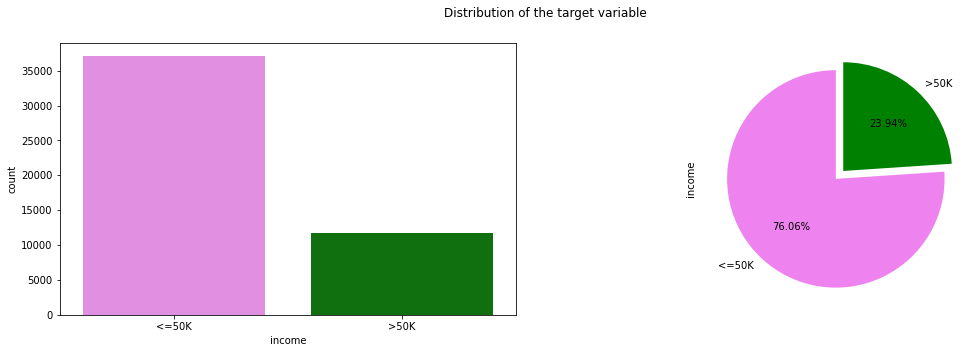

In [48]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=data['income'], palette=['violet','green'])
plt.subplot(1,2,2)
data['income'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1], startangle=90, colors=['violet','green'],labels = ['<=50K','>50K'])
plt.suptitle('Distribution of the target variable')
plt.show()

- Cleaarly The dataset is imbalanced.So that, I used SMOTE technique for Balance the dataset.

In [49]:
from imblearn.over_sampling import  SMOTE

In [50]:
smt = SMOTE()

In [51]:
ohe_df, y =  smt.fit_resample(ohe_df, y)

In [52]:
ohe_df.shape, y.shape

((74216, 104), (74216,))

In [53]:
adult_ohe_df = ohe_df.to_csv("ohe_df_ adult.csv")

In [54]:
adult_y = y.to_csv("y_adult.csv")

__Feature Scaling__ 

In [55]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [56]:
ohe_df["age"] = scale.fit_transform(np.array(ohe_df["age"]).reshape(-1,1))

In [57]:
ohe_df["fnlwgt"] = scale.fit_transform(np.array(ohe_df["fnlwgt"]).reshape(-1,1))

In [58]:
ohe_df["hours_per_week"] = scale.fit_transform(np.array(ohe_df["hours_per_week"]).reshape(-1,1))

In [59]:
ohe_df

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,0.131148,0.529146,0.0,0.0,0.375000,0.00000,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
1,0.344262,0.191240,0.0,0.0,0.875000,0.00000,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
2,0.180328,0.800849,0.0,0.0,0.375000,0.00000,1.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
3,0.442623,0.365163,0.0,0.0,0.375000,0.00000,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
4,0.016393,0.224991,0.0,0.0,0.000000,0.00000,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74211,0.542733,0.023980,0.0,0.0,0.642844,0.00000,0.0,0.0,0.464312,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535688,0.0,0.0
74212,0.364795,0.243156,0.0,0.0,0.875000,0.00000,0.0,0.0,0.252485,0.747515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
74213,0.552854,0.189333,0.0,0.0,0.558218,0.00000,0.0,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
74214,0.658072,0.336006,0.0,0.0,0.898813,0.00000,0.0,0.0,0.190507,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [79]:
y = np.where(y == '<=50K',0,1)
y

array(1)

__Train_Test_Split:__

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(ohe_df,y,random_state=44,shuffle = True,test_size=0.30)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((51951, 104), (22265, 104), (51951,), (22265,))

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Model Building</p>

In [64]:
import keras
from keras import Sequential
from tensorflow.keras.models import Sequential
from keras.layers.normalization import layer_normalization
from keras.layers import Dense

In [65]:
ann = Sequential()
ann.add(Dense(units = 104, kernel_initializer = "random_uniform", activation = "relu", input_dim = x_train.shape[1]))
ann.add(Dense(units = 52, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 26, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 13, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 7, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 4, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 2, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid"))

In [66]:
ann.compile(loss = ['binary_crossentropy'], optimizer = "adam", metrics =["accuracy"])

In [67]:
ann.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               10920     
                                                                 
 dense_1 (Dense)             (None, 52)                5460      
                                                                 
 dense_2 (Dense)             (None, 26)                1378      
                                                                 
 dense_3 (Dense)             (None, 13)                351       
                                                                 
 dense_4 (Dense)             (None, 7)                 98        
                                                                 
 dense_5 (Dense)             (None, 4)                 32        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [68]:
ann.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 700)

Epoch 1/200
75/75 [==============================] - 3s 6ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 2/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 3/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 4/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 5/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 6/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 7/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 8/200
7

Epoch 59/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 60/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 61/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 62/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 63/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 64/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 65/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 

75/75 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 174/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 175/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 176/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 177/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 178/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 179/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 180/200

In [69]:
ann.history.history

{'loss': [0.6931498646736145,
  0.693153977394104,
  0.6931487917900085,
  0.6931579113006592,
  0.6931515336036682,
  0.6931493282318115,
  0.6931474208831787,
  0.6931475400924683,
  0.693151593208313,
  0.6931518912315369,
  0.6931554079055786,
  0.6931502223014832,
  0.6931481957435608,
  0.6931471228599548,
  0.6931536793708801,
  0.6931567788124084,
  0.693154513835907,
  0.6931480765342712,
  0.6931508183479309,
  0.6931499242782593,
  0.6931518912315369,
  0.6931481957435608,
  0.693150520324707,
  0.6931478381156921,
  0.6931467652320862,
  0.6931508183479309,
  0.6931491494178772,
  0.6931613683700562,
  0.693148672580719,
  0.6931490898132324,
  0.6931461095809937,
  0.6931478977203369,
  0.6931473016738892,
  0.6931607723236084,
  0.6931484937667847,
  0.6931520104408264,
  0.693152666091919,
  0.6931458711624146,
  0.6931522488594055,
  0.6931514143943787,
  0.6931470632553101,
  0.6931462287902832,
  0.6931487917900085,
  0.6931506991386414,
  0.6931482553482056,
  0.6931

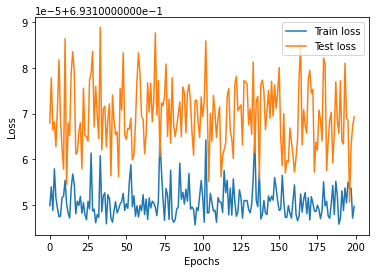

In [71]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,200)), ann.history.history['loss'], label = "Train loss")
plt.plot(list(range(0,200)), ann.history.history['val_loss'], label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

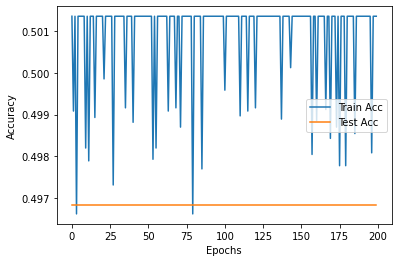

In [72]:
plt.plot(list(range(0,200)), ann.history.history['accuracy'], label = "Train Acc")
plt.plot(list(range(0,200)), ann.history.history['val_accuracy'], label = "Test Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [73]:
y_probs = ann.predict(x_test)

In [74]:
y_probs

array([[0.4985817],
       [0.4985817],
       [0.4985817],
       ...,
       [0.4985817],
       [0.4985817],
       [0.4985817]], dtype=float32)

In [75]:
y_pred = np.where(y_probs>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
confusion_matrix(y_pred, y_test)

array([[11062, 11203],
       [    0,     0]], dtype=int64)

In [78]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.66     22265
           1       0.00      0.00      0.00         0

    accuracy                           0.50     22265
   macro avg       0.50      0.25      0.33     22265
weighted avg       1.00      0.50      0.66     22265

